## KMeans 

Functions used for common tasks when applying unsupervised learning.

<u> Contents </u> <br>
[1.KMeans & Elbow Technique](#section1) <br>
2. Output Cluster Column <br>
[3.Cluster Distrubution](#section3)<br>
4. Create seperate df per Cluster <br>
5a. Plot boxplots to understand the clusters (matplotlib)<br>
5b. Plot boxplots to understand the clusters (plotly)

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#### 1. KMeans & Elbow Technique 
KMeans algorithm followed by Elbow Technique to determine the optimumn number of clusters<br>

Here we will take numerical data, and assign them a category based on trends identified by unsupervised learnign techniques. <br>


Theory about the algorithm and further details can be seen in my notes below: <br>
https://github.com/VirajVaitha123/Machine-Learning/blob/master/Unsupervised%20Learning/1.%20Unsupervised%20Learning%20Hard%20Clustering.ipynb

In [74]:
cdf = pd.read_csv("C:/Users/Viraj/Work/Code-Repo/Data/testdata.csv") # Importing Data
                                 
# Removing the text column (names) 
# We can append this back on after so we have the identifier column for each value                                
cdf2 = cdf[['Did you experience any delays on your flight', 
                    'The plane was clean',
                   'You enjoyed the food during your flight',
                     'Flight attendants solved your problems quickly',
                   'You enjoyed the customer service during your flight ',
                   'You would like to travel with us again']]                                                                      
                                                                     



In [75]:
def kmeans_elbowcurve(df: "numerical_dataframe",k_start:int, k_end:int,color ='tab:purple'):
    """
    Outputs a graph to visualise the interia when using a different number of clusters for KMeans. 
    This elbow technique is used to identify the number of clusters present. This is subjective to the level of granularity you wish to explore.
    For example, hiearchy of relationships/clusters may be present. k =2 could be male/female clusters, whereas k=4 could give you male white, male asain, female white, female asian. 
    You must further explore your data to understand the clusters
    """
    
    
    sse = {}                                 #Empty dictionary to store key value pairs. 
                                             #Key = Number of clusters
                                             # value = Inertia
    
    for k in range(1,10):                   #Find the inertia when number of clusters=1,2,3,4...
        kmeans = KMeans(n_clusters = k)     #Initiate algorithm
        kmeans = kmeans.fit(cdf2)           #fit the algorithm to the data
        sse[k] = kmeans.inertia_            #obtain the inertia and store in the dictionary
    
    plt.plot(list(sse.keys()),
             list(sse.values()),
             color= color)

    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")
    plt.title("Determine K - Inertia vs Number of Clusters")
    return plt.show()


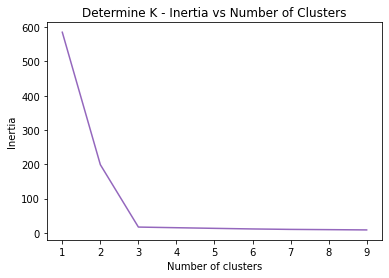

In [76]:
kmeans_elbowcurve(cdf2,1,10)

#### 2. Cluster output column
The elbow technique identifies that 3 could be a good number for k (number of clusters). <br>
Our next task is to create a new column that shows the predicted cluster.
First we must used the trained model to predict the cluster. 

In [77]:
def kmeans_clusteroutputs(k:int,df: "dataframe",original_df:"dataframe", random_state=42, show_data = True) -> "numerical column in a dataframe":
    """
    Predict cluster outputs and add the new column to the dataset. The information is added to the table which contains the identifer column (& other text fields) as opposed to the numerical      data. The column name will be Cluster. 

    """
    kmeans = KMeans(n_clusters = k,                #initiating the algorithm
                      random_state = random_state) 

    kmeans = kmeans.fit(df)                        #Applying the algorithm to your data
    
    original_df['Cluster'] = kmeans.predict(df)    #Attaches cluster column to the original data
    
    if show_data == True:
        return original_df.head()                  #default shows first 5 rows of the table, can be switched off by show_data flag

    else:
        None

In [78]:
kmeans_clusteroutputs(3,cdf2,cdf,random_state=42,show_data = True)

,Did you experience any delays on your flight,The plane was clean,You enjoyed the food during your flight,Flight attendants solved your problems quickly,You enjoyed the customer service during your flight,You would like to travel with us again,Name,Cluster
0,0.355732,3.510750,2.500382,2.053362,-1.074636,-0.594640,Sarah,1
1,3.149166,-0.571830,-0.754536,0.256247,-0.003279,1.489208,Mo,0
2,0.243192,3.386973,2.638727,1.225698,-1.001229,-1.651934,David,1
3,-0.098057,3.816995,2.211772,1.504443,-1.244400,-0.508349,Neil,1
4,-1.661912,2.846453,1.949537,2.474015,-1.639183,3.546643,Viraj,2


Cluster Distrubution <a class="anchor" id="section3"> </a> <br>
The count of each cluster present in your data

In [89]:
def cluster_counts(df:"dataframe",cluster_column = "Cluster",color ="tab:purple", title = "Cluster Distrubution"):
        """
        function to count the number of each cluster present and display the data as a barchart
        """

        ax = df[cluster_column].value_counts().plot(kind='bar',
                                             x = 'Cluster',
                                             y = 'Count',
                                             figsize=(14,8),
                                             color  = color,
                                             title  = title)
        
  

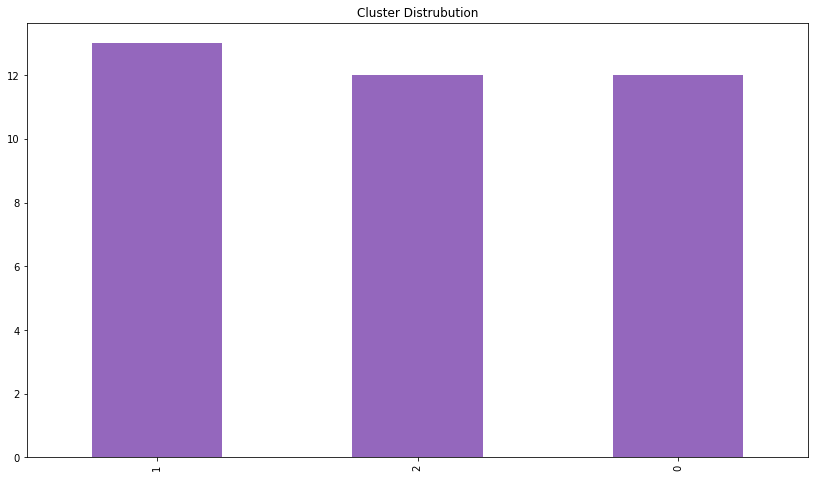

In [90]:
cluster_counts(cdf)

#### 4. Create Seperate dataframe for each cluster in the dataset
Creating seperate datasets allows us to conviently create the required box plots in the next step

In [93]:

d={}   #Initiate dictionary


for x in range(0,3):                                     #for 0,1 and  clusters
        d["df{0}".format(x)]= cdf[(cdf.Cluster == x)] 

#### 5. Create boxplots to understand the nature of the clusters

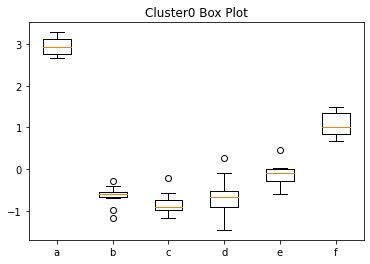

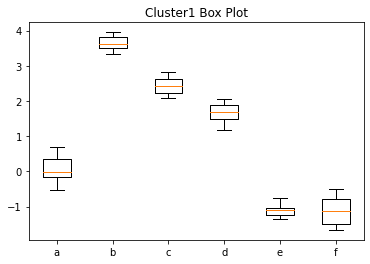

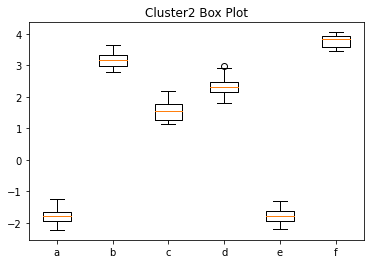

In [94]:
for x in range(0,3):
    fig1, ax1 = plt.subplots()
    box_plot_data = (d["df{0}".format(x)].iloc[:,0],
                 d["df{0}".format(x)].iloc[:,1],
                 d["df{0}".format(x)].iloc[:,2],
                 d["df{0}".format(x)].iloc[:,3],
                 d["df{0}".format(x)].iloc[:,4],
                 d["df{0}".format(x)].iloc[:,5])
    
    plt.boxplot(box_plot_data)
    ax1.set_title(str("Cluster{0} ".format(x)) +  "Box Plot")
    plt.xticks([1,2,3,4,5,6], ['a','b','c','d','e','f'])
    plt.show()